# DNA & RNA Simulated Load Balancing Plots

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy
sns.set_context('talk')
sns.set_style('ticks')
import warnings
warnings.filterwarnings("ignore")

In [2]:
#cores
cores = [1, 2, 4, 8, 16, 20, 32, 64, 128, 256]

# DNA 1 & 2

In [3]:
#read in data
d1 = pd.read_csv('../data/simulation_timings/DNA1.simulate.txt', sep='\t', header=None,
                names=['case', 'cores', 'idle_time', 'compute_time', 'total_time', '%_wasted'])

#read in data
d2 = pd.read_csv('../data/simulation_timings/DNA2.simulate.txt', sep='\t', header=None,
                names=['case', 'cores', 'idle_time', 'compute_time', 'total_time', '%_wasted'])

#sort by 'case'
d1 = d1.sort_values(by=['case'])
d2 = d2.sort_values(by=['case'])

In [4]:
#separate cases (10 rows per case)
#DNA1
d1_ascending = d1.iloc[0:10].sort_values(by=['cores'])
d1_original = d1.iloc[10:20].sort_values(by=['cores'])
d1_random = d1.iloc[20:30].sort_values(by=['cores'])
d1_descending = d1.iloc[30:40].sort_values(by=['cores'])

#DNA2
d2_ascending = d2.iloc[0:10].sort_values(by=['cores'])
d2_original = d2.iloc[10:20].sort_values(by=['cores'])
d2_random = d2.iloc[20:30].sort_values(by=['cores'])
d2_descending = d2.iloc[30:40].sort_values(by=['cores'])

#calculate speedups
#DNA1
d1_ascending_speedup = [d1_ascending.iloc[0]['total_time']/p for p in d1_ascending['total_time']]
d1_original_speedup = [d1_original.iloc[0]['total_time']/p for p in d1_original['total_time']]
d1_random_speedup = [d1_random.iloc[0]['total_time']/p for p in d1_random['total_time']]
d1_descending_speedup = [d1_descending.iloc[0]['total_time']/p for p in d1_descending['total_time']]

#DNA2
d2_ascending_speedup = [d2_ascending.iloc[0]['total_time']/p for p in d2_ascending['total_time']]
d2_original_speedup = [d2_original.iloc[0]['total_time']/p for p in d2_original['total_time']]
d2_random_speedup = [d2_random.iloc[0]['total_time']/p for p in d2_random['total_time']]
d2_descending_speedup = [d2_descending.iloc[0]['total_time']/p for p in d2_descending['total_time']]

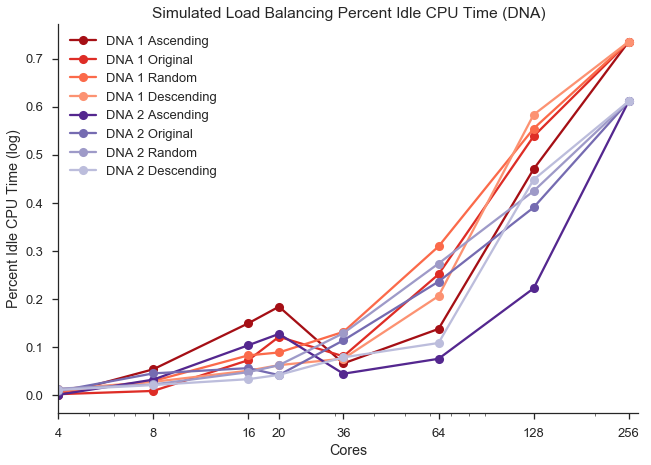

In [5]:
#plot %wasted vs. cores for simulated sorting
#DNA1
plt.plot(cores, d1_ascending['%_wasted'], '-o', c ='#a50f15', label='DNA 1 Ascending')
plt.plot(cores, d1_original['%_wasted'], '-o', c ='#de2d26', label='DNA 1 Original')
plt.plot(cores, d1_random['%_wasted'], '-o', c ='#fb6a4a', label='DNA 1 Random')
plt.plot(cores, d1_descending['%_wasted'], '-o', c ='#fc9272', label='DNA 1 Descending')

#DNA2
plt.plot(cores, d2_ascending['%_wasted'], '-o', c ='#54278f', label='DNA 2 Ascending')
plt.plot(cores, d2_original['%_wasted'], '-o', c ='#756bb1', label='DNA 2 Original')
plt.plot(cores, d2_random['%_wasted'], '-o', c ='#9e9ac8', label='DNA 2 Random')
plt.plot(cores, d2_descending['%_wasted'], '-o', c ='#bcbddc', label='DNA 2 Descending')

#labels & axes
plt.title('Simulated Load Balancing Percent Idle CPU Time (DNA)')
plt.xlabel('Cores')
plt.ylabel('Percent Idle CPU Time (log)')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.xticks([1, 2, 4, 8, 16, 20, 32, 64, 128, 256], ('1','2','4','8','16','20','36','64','128','256'))
plt.xlim([4, 275])
sns.despine();

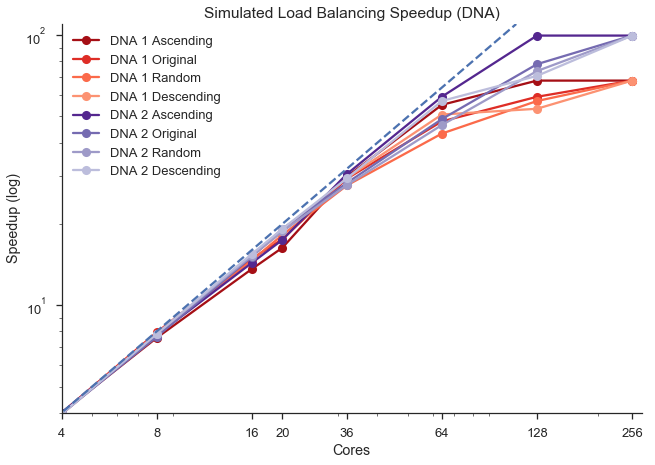

In [6]:
#plot speedup vs. cores for simulated sorting
#DNA1
plt.plot(cores, d1_ascending_speedup, '-o', c ='#a50f15', label='DNA 1 Ascending')
plt.plot(cores, d1_original_speedup, '-o', c ='#de2d26', label='DNA 1 Original')
plt.plot(cores, d1_random_speedup, '-o', c ='#fb6a4a', label='DNA 1 Random')
plt.plot(cores, d1_descending_speedup, '-o', c ='#fc9272', label='DNA 1 Descending')

#DNA2
plt.plot(cores, d2_ascending_speedup, '-o', c ='#54278f', label='DNA 2 Ascending')
plt.plot(cores, d2_original_speedup, '-o', c ='#756bb1', label='DNA 2 Original')
plt.plot(cores, d2_random_speedup, '-o', c ='#9e9ac8', label='DNA 2 Random')
plt.plot(cores, d2_descending_speedup, '-o', c ='#bcbddc', label='DNA 2 Descending')

# add diagonal line
x = [0, 110]
y = [0, 110]
plt.plot(x, y, '--')

#labels & axes
plt.title('Simulated Load Balancing Speedup (DNA)')
plt.xlabel('Cores')
plt.ylabel('Speedup (log)')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.xticks([1, 2, 4, 8, 16, 20, 32, 64, 128, 256], ('1','2','4','8','16','20','36','64','128','256'))
plt.yscale('log')
plt.xlim([4,275])
plt.ylim([4,110])
sns.despine();

# RNA 1 & 2

In [7]:
#read in data
r1 = pd.read_csv('../data/simulation_timings/RNA1.simulate.txt', sep='\t', header=None,
                names=['case', 'cores', 'idle_time', 'compute_time', 'total_time', '%_wasted'])
r2 = pd.read_csv('../data/simulation_timings/RNA2.simulate.txt', sep='\t', header=None,
                names=['case', 'cores', 'idle_time', 'compute_time', 'total_time', '%_wasted'])

#sort by 'case'
r1 = r1.sort_values(by=['case'])
r2 = r2.sort_values(by=['case'])

In [8]:
#separate cases (10 rows per case)
#RNA1
r1_ascending = r1.iloc[0:10].sort_values(by=['cores'])
r1_original = r1.iloc[10:20].sort_values(by=['cores'])
r1_random = r1.iloc[20:30].sort_values(by=['cores'])
r1_descending = r1.iloc[30:40].sort_values(by=['cores'])

#RNA2
r2_ascending = r2.iloc[0:10].sort_values(by=['cores'])
r2_original = r2.iloc[10:20].sort_values(by=['cores'])
r2_random = r2.iloc[20:30].sort_values(by=['cores'])
r2_descending = r2.iloc[30:40].sort_values(by=['cores'])

#speedup
#RNA1
r1_ascending_speedup = [r1_ascending.iloc[0]['total_time']/p for p in r1_ascending['total_time']]
r1_original_speedup = [r1_original.iloc[0]['total_time']/p for p in r1_original['total_time']]
r1_random_speedup = [r1_random.iloc[0]['total_time']/p for p in r1_random['total_time']]
r1_descending_speedup = [r1_descending.iloc[0]['total_time']/p for p in r1_descending['total_time']]

#RNA2
r2_ascending_speedup = [r2_ascending.iloc[0]['total_time']/p for p in r2_ascending['total_time']]
r2_original_speedup = [r2_original.iloc[0]['total_time']/p for p in r2_original['total_time']]
r2_random_speedup = [r2_random.iloc[0]['total_time']/p for p in r2_random['total_time']]
r2_descending_speedup = [r2_descending.iloc[0]['total_time']/p for p in r2_descending['total_time']]

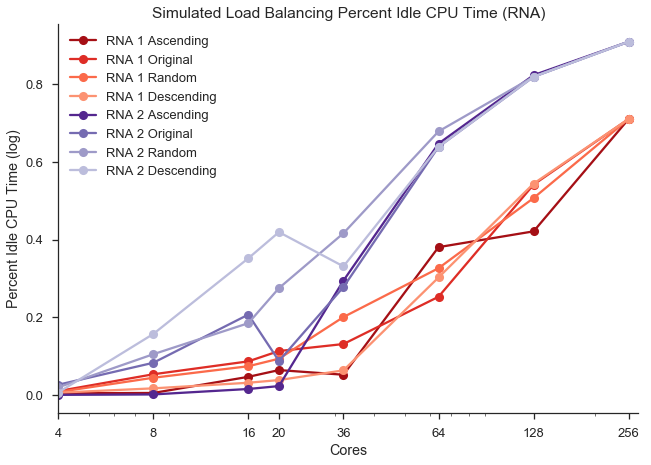

In [9]:
#plot %wasted vs. cores for simulated sorting
#RNA1
plt.plot(cores, r1_ascending['%_wasted'], '-o', c ='#a50f15', label='RNA 1 Ascending')
plt.plot(cores, r1_original['%_wasted'], '-o', c ='#de2d26', label='RNA 1 Original')
plt.plot(cores, r1_random['%_wasted'], '-o', c ='#fb6a4a', label='RNA 1 Random')
plt.plot(cores, r1_descending['%_wasted'], '-o', c ='#fc9272', label='RNA 1 Descending')

#DNA2
plt.plot(cores, r2_ascending['%_wasted'], '-o', c ='#54278f', label='RNA 2 Ascending')
plt.plot(cores, r2_original['%_wasted'], '-o', c ='#756bb1', label='RNA 2 Original')
plt.plot(cores, r2_random['%_wasted'], '-o', c ='#9e9ac8', label='RNA 2 Random')
plt.plot(cores, r2_descending['%_wasted'], '-o', c ='#bcbddc', label='RNA 2 Descending')

#labels & axes
plt.title('Simulated Load Balancing Percent Idle CPU Time (RNA)')
plt.xlabel('Cores')
plt.ylabel('Percent Idle CPU Time (log)')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.xticks([1, 2, 4, 8, 16, 20, 32, 64, 128, 256], ('1','2','4','8','16','20','36','64','128','256'))
plt.xlim([4, 275])
sns.despine();

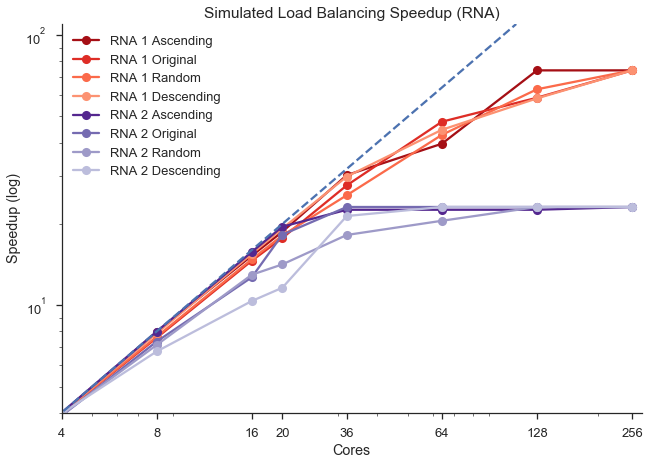

In [10]:
#plot speedup vs. cores for simulated sorting
#RNA1
plt.plot(cores, r1_ascending_speedup, '-o', c ='#a50f15', label='RNA 1 Ascending')
plt.plot(cores, r1_original_speedup, '-o', c ='#de2d26', label='RNA 1 Original')
plt.plot(cores, r1_random_speedup, '-o', c ='#fb6a4a', label='RNA 1 Random')
plt.plot(cores, r1_descending_speedup, '-o', c ='#fc9272', label='RNA 1 Descending')

#RNA2
plt.plot(cores, r2_ascending_speedup, '-o', c ='#54278f', label='RNA 2 Ascending')
plt.plot(cores, r2_original_speedup, '-o', c ='#756bb1', label='RNA 2 Original')
plt.plot(cores, r2_random_speedup, '-o', c ='#9e9ac8', label='RNA 2 Random')
plt.plot(cores, r2_descending_speedup, '-o', c ='#bcbddc', label='RNA 2 Descending')

# add diagonal line
x = [0, 110]
y = [0, 110]
plt.plot(x, y, '--')

#labels & axes
plt.title('Simulated Load Balancing Speedup (RNA)')
plt.xlabel('Cores')
plt.ylabel('Speedup (log)')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.xticks([1, 2, 4, 8, 16, 20, 32, 64, 128, 256], ('1','2','4','8','16','20','36','64','128','256'))
plt.yscale('log')
plt.xlim([4,275])
plt.ylim([4,110])
sns.despine();

In [11]:
d1_wasted = d1_ascending['%_wasted'].values/d1_original['%_wasted'].values
d2_wasted = d2_ascending['%_wasted'].values/d2_original['%_wasted'].values
r1_wasted = r1_ascending['%_wasted'].values/r1_original['%_wasted'].values
r2_wasted = r2_ascending['%_wasted'].values/r2_original['%_wasted'].values

wasted_df = pd.DataFrame({'cores':cores, 'd1':d1_wasted, 'd2':d2_wasted, 'r1':r1_wasted, 'r2':r2_wasted})
wasted_df

,cores,d1,d2,r1,r2
0,1,1.000000,1.000000,1.000000,1.000000
1,2,0.145332,0.061247,0.010687,0.076024
2,4,0.219239,0.054352,0.442248,0.017115
3,8,6.282384,0.712398,0.099605,0.018569
4,16,2.058319,1.851369,0.540565,0.075183
5,20,1.517039,3.065389,0.567139,0.262697
6,32,0.816966,0.389561,0.398387,1.060181
7,64,0.547683,0.319481,1.505171,1.013083
8,128,0.873191,0.568745,0.777881,1.005099
9,256,1.000000,1.000000,1.000000,1.000000


In [12]:
wasted_df = wasted_df.melt('cores', var_name='cols',  value_name='idle_ratio')

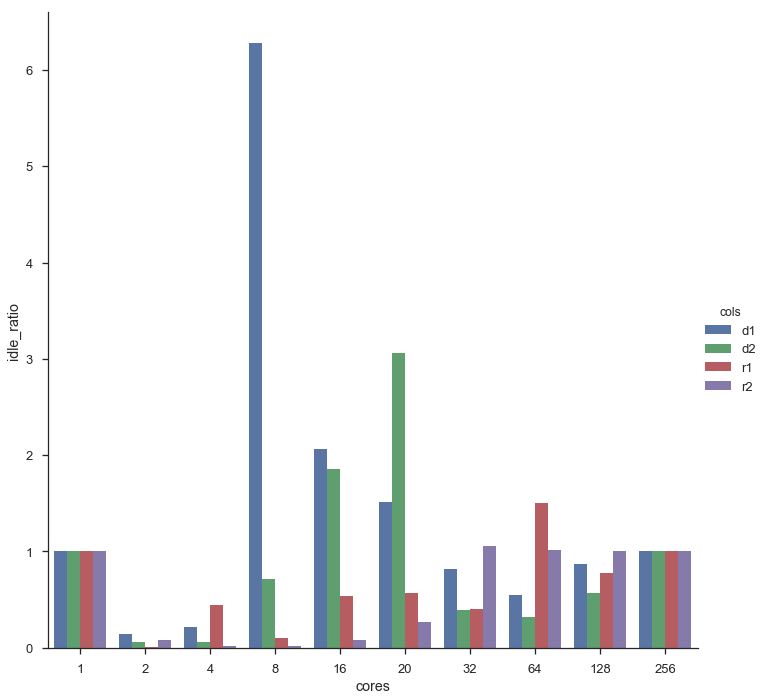

In [13]:
sns.factorplot(x="cores", y="idle_ratio", kind='bar', hue='cols', size=10, data=wasted_df)